# Ejercicio Aplicando PCA: Principal Component Analysis

Lee el articulo completo en www.aprendemachinelearning.com

### Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

### Cargamos datos de entrada

In [2]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")
dataframe.tail(10)
# REFERENCIAS:
# ingresos y gastos son mensuales de 1 personas o 2 si están casados.
# trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo
# estado_civil: 0-soltero 1-casado 2-divorciado
# hijos: Cantidad de hijos menores (no trabajan)
# comprar: 0-mejor alquilar 1-Comprar casa
# hipoteca fija a 30 años con interes

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


### Visualicemos las dimensiones

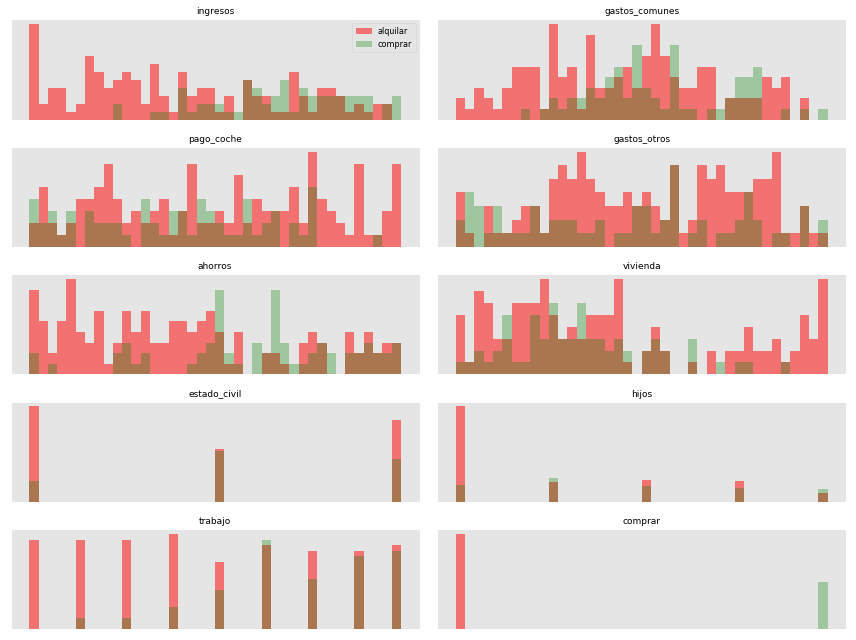

In [3]:
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features
alquilar=dataframe[dataframe['comprar']==0] # conviene alquilar casa
comprar=dataframe[dataframe['comprar']==1] # conviene comprar casa
ax=axes.ravel()
for i in range(len(dataframe.columns)):
  _,bins=np.histogram(dataframe[dataframe.columns[i]],bins=40)
  ax[i].hist(alquilar.values[:,i],bins=bins,color='r',alpha=.5)# rojo alquilar
  ax[i].hist(comprar.values[:,i],bins=bins,color='g',alpha=0.3)# verde para comprar
  ax[i].set_title(dataframe.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['alquilar','comprar'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

### Ejemplo de como se correlacionan

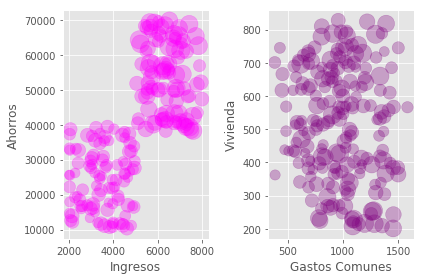

In [4]:
plt.subplot(1,2,1)#fisrt plot
plt.scatter(dataframe['ingresos'], dataframe['ahorros'], s=dataframe['vivienda']*0.0005, color='magenta', label='check', alpha=0.3)
plt.xlabel('Ingresos',fontsize=12)
plt.ylabel('Ahorros',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(dataframe['gastos_comunes'], dataframe['gastos_otros'], s=dataframe['vivienda']*0.0005, color='purple', label='check', alpha=0.3)
plt.xlabel('Gastos Comunes',fontsize=12)
plt.ylabel('Vivienda',fontsize=12)
plt.tight_layout()
plt.show()

## Vamos a Normalizar ó Estandalizar los datos

In [5]:
scaler=StandardScaler()#instantiate
df = dataframe.drop(['comprar'], axis=1)
scaler.fit(df) # calcula la media y estandar para cada dimension
X_scaled=scaler.transform(df)# transforma los datos a su nueva escala

after scaling minimum [-1.75791345 -2.16475652 -1.69895439 -1.87508126 -1.64128552 -1.44667719
 -1.22708822 -0.90342598 -1.77508704]


## Aplicamos PCA

In [6]:
pca=PCA(n_components=9)
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (202, 9)


### Veamos cuán buenos predictores son las nuevas dimensiones

In [7]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#con 5 componentes tenemos algo mas del 85% de varianza explicada

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


### graficamos la variacion explicada acumulada

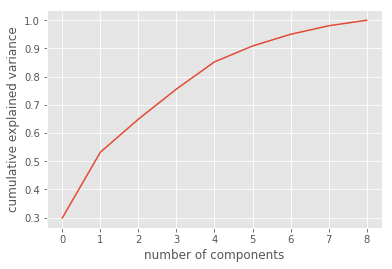

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Graficamos los 2 componentes principales

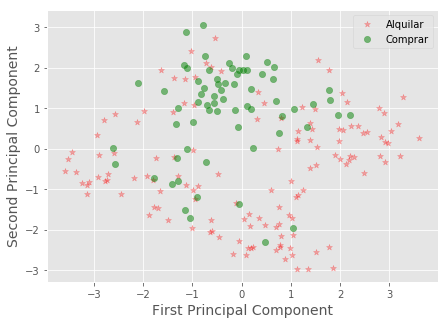

In [9]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['comprar'].values
#labels=[0,1] # Malignant, Beningn
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

# please check the scatter plot of the remaining component and you will see and understand the difference

### Veamos la correlacion entre las nuevas componentes y las dimensiones originales

/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


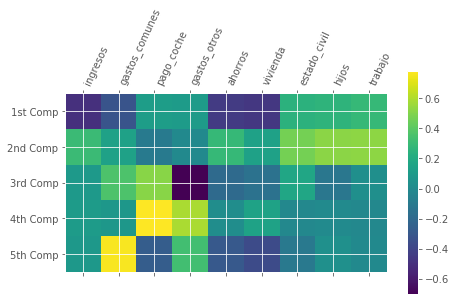

In [10]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [11]:
components = pd.DataFrame(pca.components_, columns = df.columns)
components

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,-0.493720,-0.318229,0.123771,0.111876,-0.444650,-0.462609,0.252279,0.259859,0.290248
1,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
2,0.091419,0.363453,0.516144,-0.701986,-0.191767,-0.140513,0.172885,-0.112184,0.036910
3,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
4,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
5,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
6,0.154319,-0.105598,0.027333,0.101876,0.524584,-0.641034,0.212365,-0.460067,0.105053
7,0.012732,-0.010274,0.061759,-0.037977,0.212759,-0.260847,0.204816,0.532216,-0.745630
8,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


## Preparo nuevas entradas para validar el algoritmo

In [12]:
# Split dataset in training and test datasets
dfScaledPca = pd.DataFrame(X_pca, columns = df.columns)
dfScaledPca["comprar"]=dataframe["comprar"]
print (dfScaledPca.head())
print(dfScaledPca.shape)
X_train, X_test = train_test_split(dfScaledPca, test_size=0.2, random_state=4) #6 
y_train =X_train["comprar"]
y_test = X_test["comprar"]
X_train = X_train.drop(['comprar'], axis=1)
X_test = X_test.drop(['comprar'], axis=1)

   ingresos  gastos_comunes  pago_coche  gastos_otros   ahorros  vivienda  \
0 -1.321915       -0.222950   -1.599863     -0.885014  0.646617 -0.700208   
1 -1.147878        1.716967   -0.395722     -0.447960 -0.687805 -0.231969   
2 -0.090369        1.836066   -1.359382      0.337505  0.742387  0.593030   
3 -3.455898       -0.078279    0.202382     -1.573584 -0.068551 -0.051945   
4 -0.916933       -1.184676   -0.190036      0.117804 -0.147753 -0.619750   

   estado_civil     hijos   trabajo  comprar  
0     -0.318031  0.751809  0.269984        1  
1     -1.542487 -0.221799  0.438425        0  
2      1.540495 -0.668120  0.153463        1  
3     -0.909409 -0.684486 -0.129045        0  
4      0.450419 -0.194341  0.687452        1  
(202, 10)


## Prediccion con Gaussian Naive Bayes

### Con datos de entrada con reducción de dimensiones por PCA

In [13]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train.values,
    y_train
)
y_pred = gnb.predict(X_test)

## Resultados Obtenidos

In [14]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train))) #batir  87
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))  #batir  90

Precisión en el set de Entrenamiento: 0.93
Precisión en el set de Test: 0.90


In [15]:
# Print Test results
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          X_test.shape[0],
          (y_test != y_pred).sum()
))

Total de Muestras en Test: 41
Fallos: 4


In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28  2]
 [ 2  9]]
             precision    recall  f1-score   support

          0       0.93      0.93      0.93        30
          1       0.82      0.82      0.82        11

avg / total       0.90      0.90      0.90        41



### Comprobamos con predicciones individuales

In [19]:
X_scaledTest=scaler.transform([[6830,1298,345,309,46761,429812,1,1,5], # 1
                               [4054,1095,371,440,22183,223971,1,0,3], # 0
                               [6455,1033,98,795,57463,321779,2,1,8], # 1
                               [6470,1035,39,782,57439,606291,0,0,1] #0
                    ])
X_pcaTest=pca.transform(X_scaledTest) 
#print(X_pcaTest)
print(gnb.predict(X_pcaTest))

[1 0 1 0]
